In [3]:
import requests

In [116]:
r = requests.get('https://d3c33hcgiwev3.cloudfront.net/_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt?Expires=1581724800&Signature=am4yRn7oHbwfJ7W~mI48EsSlIOK5~KISSvhbWhmt85Yy3LARFQ6pz69V5oHp22iDAKcZRurSMgUnteL9dJTpCnURv~jEBqLBLvg8LNvvyhQ9YZmLSx10-L2cVWeAmslECjQzrKX1hPrMSF46qaKCc9hJAJ2lD2VgeJ~eQxpV6Yk_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A')
list_lines = r.content.decode().lower().split('\n')
list_lines[0:-1]

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [67]:
import re
#токенизация
res = [re.split('[^a-z]',i) for i in list_lines]
res[0]

['in',
 'comparison',
 'to',
 'dogs',
 '',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process',
 '']

In [68]:
#удаление пустых слов
new_lines = []
for line in res:
    new_lines.append([i for i in line if i])
new_lines[0]

['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process']

In [66]:
all_words = set()
for lst in new_lines:
    for word in lst:
        all_words.add(word)

print(list(all_words)[0:10])

['streams', 'they', 'used', 'changes', 'major', 'left', 'output', 'high', 'domestication', 'both']


In [86]:
ngram = {k: i for i, k in enumerate(all_words)}
ngram

{'streams': 0,
 'they': 1,
 'used': 2,
 'changes': 3,
 'major': 4,
 'left': 5,
 'output': 6,
 'high': 7,
 'domestication': 8,
 'both': 9,
 'named': 10,
 'needing': 11,
 'unix': 12,
 'run': 13,
 'mountain': 14,
 'deliberately': 15,
 'mavericks': 16,
 'a': 17,
 'os': 18,
 'allow': 19,
 'as': 20,
 'possess': 21,
 'on': 22,
 'type': 23,
 'simply': 24,
 'small': 25,
 'typically': 26,
 'concatenate': 27,
 'contains': 28,
 'useful': 29,
 'no': 30,
 'based': 31,
 'july': 32,
 'during': 33,
 'longer': 34,
 'files': 35,
 'count': 36,
 'sequence': 37,
 'update': 38,
 'allows': 39,
 'can': 40,
 'so': 41,
 'animals': 42,
 'hear': 43,
 'stdout': 44,
 'download': 45,
 'features': 46,
 'comparison': 47,
 'default': 48,
 'too': 49,
 'or': 50,
 'x': 51,
 'than': 52,
 'factory': 53,
 'process': 54,
 'which': 55,
 'size': 56,
 'and': 57,
 'undergone': 58,
 'october': 59,
 'tiger': 60,
 'frequency': 61,
 'create': 62,
 'catenates': 63,
 'three': 64,
 'members': 65,
 'has': 66,
 'redirection': 67,
 'common'

In [122]:
from collections import Counter
import numpy as np

r = Counter(new_lines[0])
vectors = []
for i in range(len(new_lines)):
    counts = Counter(new_lines[i])
    vector = []
    for word in ngram:
        vector.append(counts.get(word, 0))
    vectors.append(vector)

A = np.array(vectors)
print(A)

[[0 0 0 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [118]:
import scipy
res = {}
for i in range(0, A.shape[0]-1):
    res[i] = (scipy.spatial.distance.cosine(A[0], A[i]))
res

{0: 0.0,
 1: 0.9527544408738466,
 2: 0.8644738145642124,
 3: 0.8951715163278082,
 4: 0.7770887149698589,
 5: 0.9402385695332803,
 6: 0.7327387580875756,
 7: 0.9258750683338899,
 8: 0.8842724875284311,
 9: 0.9055088817476932,
 10: 0.8328165362273942,
 11: 0.8804771390665607,
 12: 0.8396432548525454,
 13: 0.8703592552895671,
 14: 0.8740118423302576,
 15: 0.9442721787424647,
 16: 0.8406361854220809,
 17: 0.956644501523794,
 18: 0.9442721787424647,
 19: 0.8885443574849294,
 20: 0.8427572744917122,
 21: 0.8250364469440588}

In [120]:
sorted(res.items(), key=lambda x: (x[1]))

[(0, 0.0),
 (6, 0.7327387580875756),
 (4, 0.7770887149698589),
 (21, 0.8250364469440588),
 (10, 0.8328165362273942),
 (12, 0.8396432548525454),
 (16, 0.8406361854220809),
 (20, 0.8427572744917122),
 (2, 0.8644738145642124),
 (13, 0.8703592552895671),
 (14, 0.8740118423302576),
 (11, 0.8804771390665607),
 (8, 0.8842724875284311),
 (19, 0.8885443574849294),
 (3, 0.8951715163278082),
 (9, 0.9055088817476932),
 (7, 0.9258750683338899),
 (5, 0.9402385695332803),
 (15, 0.9442721787424647),
 (18, 0.9442721787424647),
 (1, 0.9527544408738466),
 (17, 0.956644501523794)]

# 2 задача

In [180]:
import math
points = {1, 15}

def func(x):
    return math.sin(x/5) * math.exp(x/10) + 5*math.exp(-x/2)

res = [func(i) for i in points]
res

[3.252216865271419, 0.6352214195786656]

In [181]:
import numpy as np
A = np.array([[1,1], [1,15]])
b = np.array(res)
print(b)
print(b.shape)
print(b[:, np.newaxis])
print(b[:, np.newaxis].shape)

[3.25221687 0.63522142]
(2,)
[[3.25221687]
 [0.63522142]]
(2, 1)


In [187]:
b = b[:, np.newaxis]
x = np.linalg.solve(A, b)
x

array([[ 3.43914511],
       [-0.18692825]])

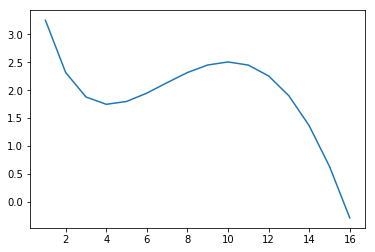

In [289]:
from matplotlib import pylab as plt
plt.plot([i for i in range(1,17)], [func(i) for i in range(1,17)]) #default

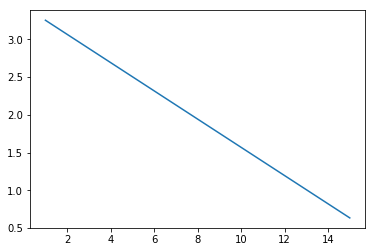

In [189]:
#for 2x
plt.plot([1, 15], [func(i) for i in [1, 15]])

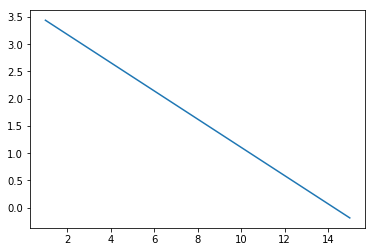

In [190]:
plt.plot([1, 15], x)

In [200]:
A = np.array([[1,1,1],[1,8,64], [1,15,225]])
res = [func(i) for i in [1, 8, 15]]
b = np.array(res)

In [201]:
x = np.linalg.solve(A, b)

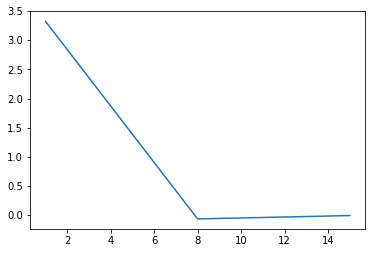

In [202]:
plt.plot([1, 8, 15], x)

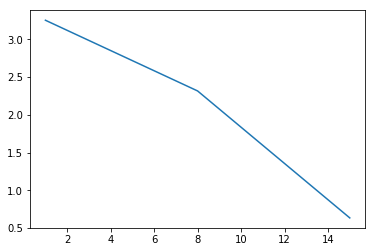

In [203]:
plt.plot([1, 8, 15], res)

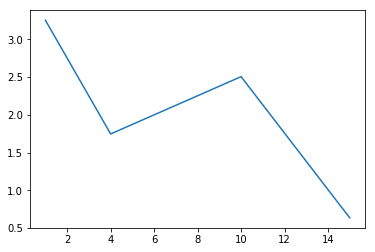

In [248]:
plt.plot([1, 4, 10, 15], [func(i) for i in [1, 4, 10, 15]])

A
 [[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
b
 [[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]
x
 [[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


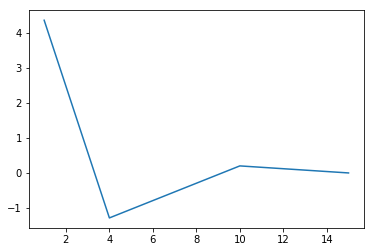

In [294]:
A = np.array([[1,1,1,1],[4**i for i in [0, 1, 2, 3]], [10**i for i in [0, 1, 2, 3]], [15**i for i in [0, 1, 2, 3]]])
print('A\n', A)
b = [func(i) for i in [1, 4, 10, 15]]
b = np.array(b)
b = b[:, np.newaxis]
print('b\n', b)

x = np.linalg.solve(A, b)
print('x\n', x)
plt.plot([1, 4, 10, 15], [i for i in x])


In [295]:
x

array([[ 4.36264154],
       [-1.29552587],
       [ 0.19333685],
       [-0.00823565]])

In [299]:
with open('G:/file.txt', 'w') as f:
    f.write(' '.join([str(i) for i in x]))

In [300]:
 [func(i) for i in [1, 4, 10, 15]]

[3.252216865271419, 1.7468459495903677, 2.5054164070002463, 0.6352214195786656]